In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [229]:
d=pd.read_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Summer 2020/Energy Storage/20200501-20200531 NYISO Hourly Actual Load.csv')

In [230]:
nyc=d.groupby('Zone').get_group('N.Y.C.')

In [231]:
dat=[]
tim=[]
for t in nyc['Date']:
    a1,b1,c1=(t.split(' '))
    dat.append(a1)
    u1,u2,u3=b1.split(':')
    if u1=='12' and c1=='AM':
        tim.append(0)
    elif u1!='12' and c1=='AM':
        tim.append(float(u1))
    elif u1=='12' and c1=='PM':
        tim.append(12)
    elif u1!='12' and c1=='PM':
        tim.append(float(u1)+12)
#    dat.append(a1)
#    tim.append(b1)
nyc['Day']=dat
nyc['Time']=tim

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [232]:
nyc=nyc.drop(columns=['Date'])

In [233]:
u=nyc.groupby('Time').mean()
u2=nyc.groupby('Time').std()

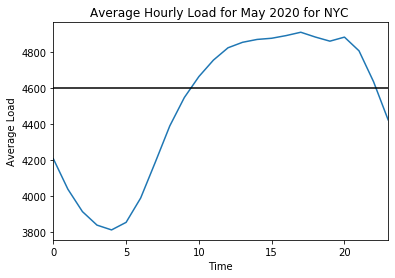

In [234]:
u['Load'].plot()
plt.axhline(4600,c='k')
plt.xlabel('Time')
plt.ylabel('Average Load')
plt.title('Average Hourly Load for May 2020 for NYC ')
plt.show()

In [235]:
data=pd.read_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Summer 2020/Energy Storage/nyiso_loads.csv')

In [236]:
data=data.drop(columns='Hr25')

In [237]:
l=np.array(data.groupby('Month').get_group(1).mean())[3:]
t=np.linspace(1,24,24)

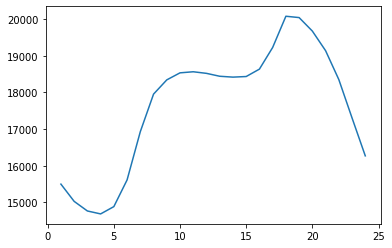

In [238]:
plt.plot(t,l)

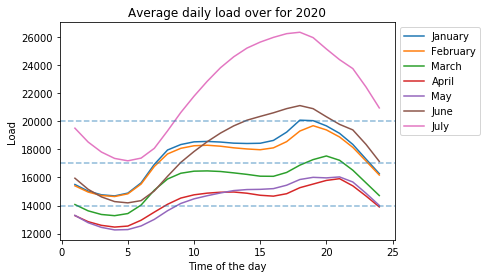

In [239]:
m=data['Month'].unique()
for x in m:
    l=np.array(data.groupby('Month').get_group(x).mean())[3:]
    t=np.linspace(1,24,24)    
    plt.plot(t,l,label=calendar.month_name[x])
    plt.xlabel('Time of the day')
    plt.ylabel('Load')
    plt.title('Average daily load over for 2020')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.axhline(14000,ls='--',alpha=0.5)
plt.axhline(17000,ls='--',alpha=0.5)
plt.axhline(20000,ls='--',alpha=0.5)
plt.show()

In [240]:
def excess(data,limit):
    u=[]
    for f in data:
        if (f-limit)<0:
            u.append(0)
        else:
            u.append(f-limit)
    return u

In [241]:
bc=85/1000 #mwh
cap=0.7 #70% working capacity
ch=0.8 #charged to 80%

In [242]:
m=data['Month'].unique()
dd_14000=pd.DataFrame()
for x in m:
    l=np.array(data.groupby('Month').get_group(x).mean())[3:]
    t=np.linspace(1,24,24) 
    ex=excess(l,14000)
    mm=[x]*len(l)
    n_evs=np.array(ex)/(bc*cap*ch)
    df={'Month':mm,'Time':t,'Load':l,'Excess':ex,'No. of EVs':np.ceil(n_evs)}
    dd2=pd.DataFrame(df)
    dd_14000=dd_14000.append(dd2,ignore_index=True)

In [243]:
m=data['Month'].unique()
dd_17000=pd.DataFrame()
for x in m:
    l=np.array(data.groupby('Month').get_group(x).mean())[3:]
    t=np.linspace(1,24,24) 
    ex=excess(l,17000)
    mm=[x]*len(l)
    n_evs=np.array(ex)/(bc*cap*ch)
    df={'Month':mm,'Time':t,'Load':l,'Excess':ex,'No. of EVs':np.ceil(n_evs)}
    dd2=pd.DataFrame(df)
    dd_17000=dd_17000.append(dd2,ignore_index=True)

In [244]:
m=data['Month'].unique()
dd_20000=pd.DataFrame()
for x in m:
    l=np.array(data.groupby('Month').get_group(x).mean())[3:]
    t=np.linspace(1,24,24) 
    ex=excess(l,20000)
    mm=[x]*len(l)
    n_evs=np.array(ex)/(bc*cap*ch)
    df={'Month':mm,'Time':t,'Load':l,'Excess':ex,'No. of EVs':np.ceil(n_evs)}
    dd2=pd.DataFrame(df)
    dd_20000=dd_20000.append(dd2,ignore_index=True)

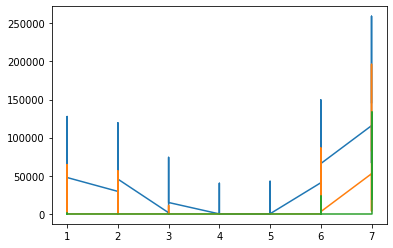

In [245]:
plt.plot(dd_14000['Month'],dd_14000['No. of EVs'])
plt.plot(dd_14000['Month'],dd_17000['No. of EVs'])
plt.plot(dd_14000['Month'],dd_20000['No. of EVs'])

<BarContainer object of 168 artists>

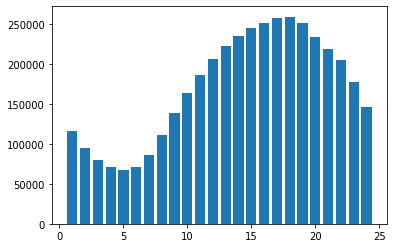

In [246]:
plt.bar(dd_14000['Time'],dd_14000['No. of EVs'])

<BarContainer object of 168 artists>

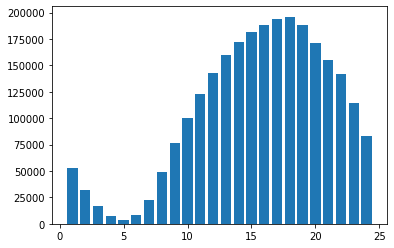

In [247]:
plt.bar(dd_17000['Time'],dd_17000['No. of EVs'])

<BarContainer object of 168 artists>

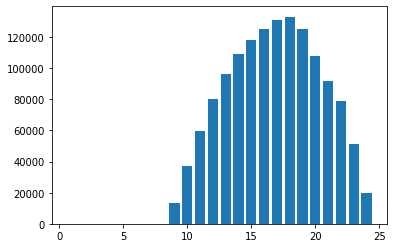

In [248]:
plt.bar(dd_20000['Time'],dd_20000['No. of EVs'])

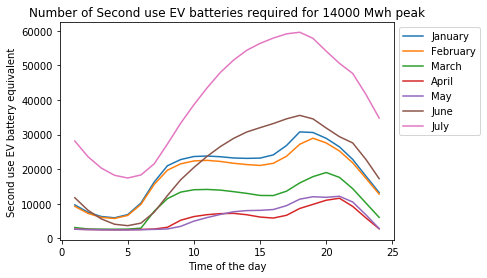

In [260]:
d1=pd.DataFrame()
for x in m:
    l=np.array(dd_14000.groupby('Month').get_group(x))
    t=np.linspace(1,24,24)
    xx=(np.mean(l,axis=1))
    plt.plot(t,xx,label=calendar.month_name[x])
    ddd={'EV equivalent':np.ceil(xx).astype(int)}
    d1=d1.append(pd.DataFrame(ddd).T)
plt.xlabel('Time of the day')
plt.ylabel('Second use EV battery equivalent')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Number of Second use EV batteries required for 14000 Mwh peak')
plt.show()

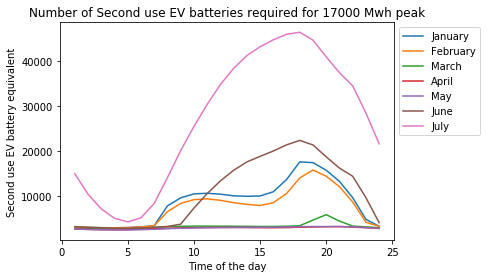

In [261]:
d2=pd.DataFrame()
for x in m:
    l=np.array(dd_17000.groupby('Month').get_group(x))
    t=np.linspace(1,24,24)
    xx=(np.mean(l,axis=1))
    plt.plot(t,xx,label=calendar.month_name[x])
    ddd={'EV equivalent':np.ceil(xx).astype(int)}
    d2=d2.append(pd.DataFrame(ddd).T)
plt.xlabel('Time of the day')
plt.ylabel('Second use EV battery equivalent')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Number of Second use EV batteries required for 17000 Mwh peak')
plt.show()

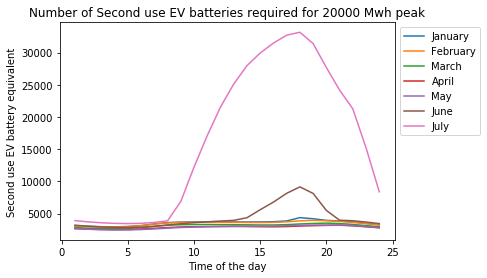

In [262]:
d3=pd.DataFrame()
for x in m:
    l=np.array(dd_20000.groupby('Month').get_group(x))
    t=np.linspace(1,24,24)
    xx=(np.mean(l,axis=1))
    plt.plot(t,xx,label=calendar.month_name[x])
    ddd={'EV equivalent':np.ceil(xx).astype(int)}
    d3=d3.append(pd.DataFrame(ddd).T)
plt.xlabel('Time of the day')
plt.ylabel('Second use EV battery equivalent')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Number of Second use EV batteries required for 20000 Mwh peak')
plt.show()

In [252]:
d1=d1.T
d1.columns=[calendar.month_name[i+1] for i in range(0,7)]
d1.index=[i+1 for i in range(0,24)]
d1.to_csv('d1.csv')

In [253]:
d2=d2.T
d2.columns=[calendar.month_name[i+1] for i in range(0,7)]
d2.index=[i+1 for i in range(0,24)]
d2.to_csv('d2.csv')

In [254]:
d3=d3.T
d3.columns=[calendar.month_name[i+1] for i in range(0,7)]
d3.index=[i+1 for i in range(0,24)]
d3.to_csv('d3.csv')

Text(0.5, 1.0, 'Average no. of battery equivalent per month')

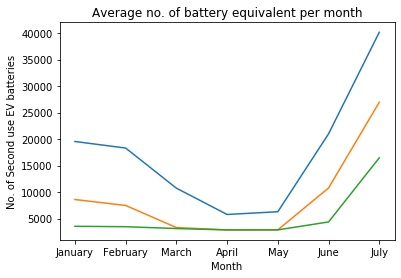

In [259]:
plt.plot(d1.mean())
plt.plot(d2.mean())
plt.plot(d3.mean())
plt.xlabel('Month')
plt.ylabel('No. of Second use EV batteries')
plt.title('Average no. of battery equivalent per month')